<a href="https://colab.research.google.com/github/youngmantis/Computional-Drug-Discovery/blob/main/CDD_DNA_topoisomerase_II_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Drug-Target Interactions Using Machine Learning Regression Model with Molecular Fingerprint and IC50 parameters.**

**Alex Oyinola Adedayo**

Inspired from https://github.com/dataprofessor/bioinformatics_freecodecamp/ 

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)


In this Jupyter notebook, we will be building a machine learning model using the ChEMBL bioactivity data.

**Notebook Contents**:


* Data Collection and Pre-Processing from the ChEMBL Database.
* Exploratory Data Analysis
* Descriptor Dataset Preparation
* Random Forest Regression





## **Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.**

In [1]:
pip install chembl_webresource_client

## **Import Libraries**

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Target search for Catalase**

In [3]:
target = new_client.target
target_query = target.search('topoisomerase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Topoisomerase I/II,15.0,False,CHEMBL4106174,"[{'accession': 'P11387', 'component_descriptio...",PROTEIN FAMILY,9606
1,"[{'xref_id': 'P11387', 'xref_name': None, 'xre...",Homo sapiens,DNA topoisomerase I,14.0,False,CHEMBL1781,"[{'accession': 'P11387', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P0AFI2', 'xref_name': None, 'xre...",Escherichia coli K-12,Topoisomerase IV subunit A,14.0,False,CHEMBL1895,"[{'accession': 'P0AFI2', 'component_descriptio...",SINGLE PROTEIN,83333
3,"[{'xref_id': 'P96583', 'xref_name': None, 'xre...",Bacillus subtilis (strain 168),DNA topoisomerase III,14.0,False,CHEMBL4320,"[{'accession': 'P96583', 'component_descriptio...",SINGLE PROTEIN,224308
4,"[{'xref_id': 'Q04750', 'xref_name': None, 'xre...",Mus musculus,DNA topoisomerase I,14.0,False,CHEMBL2814,"[{'accession': 'Q04750', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'Q02880', 'xref_name': None, 'xre...",Homo sapiens,DNA topoisomerase II beta,14.0,False,CHEMBL3396,"[{'accession': 'Q02880', 'component_descriptio...",SINGLE PROTEIN,9606
6,"[{'xref_id': 'P15348', 'xref_name': None, 'xre...",Drosophila melanogaster,DNA topoisomerase II,14.0,False,CHEMBL2671,"[{'accession': 'P15348', 'component_descriptio...",SINGLE PROTEIN,7227
7,"[{'xref_id': 'Q64511', 'xref_name': None, 'xre...",Mus musculus,DNA topoisomerase II beta,14.0,False,CHEMBL5564,"[{'accession': 'Q64511', 'component_descriptio...",SINGLE PROTEIN,10090
8,"[{'xref_id': 'Q931S2', 'xref_name': None, 'xre...",Staphylococcus aureus subsp. aureus Mu50,Topoisomerase IV subunit A,14.0,False,CHEMBL4836,"[{'accession': 'Q931S2', 'component_descriptio...",SINGLE PROTEIN,158878
9,"[{'xref_id': 'P06786', 'xref_name': None, 'xre...",Saccharomyces cerevisiae S288c,DNA topoisomerase 2,14.0,False,CHEMBL5290,"[{'accession': 'P06786', 'component_descriptio...",SINGLE PROTEIN,559292


## **Select and retrieve bioactivity data for Human DNA topoisomerase II beta (third entry)**

We will assign the sixth entry (which corresponds to the target protein, Human DNA topoisomerase II beta) to the selected_target variable

In [4]:
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL3396'

Retrieve only bioactivity data for Human DNA topoisomerase II beta (CHEMBL3396) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75892,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,40.0
1,None,78095,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.4
2,None,78096,[],CHEMBL687255,Antibacterial activity against Escherichia col...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.5
3,None,87667,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.1
4,None,87668,[],CHEMBL687255,Antibacterial activity against Escherichia col...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,None,19159924,[],CHEMBL4382900,Poison activity at recombinant human topoisome...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,UO_0000065,3.33,1.06
60,None,19159925,[],CHEMBL4382900,Poison activity at recombinant human topoisome...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,UO_0000065,6.71,4.34
61,None,22415171,[],CHEMBL4672266,Inhibition of Topoisomerase II beta (unknown o...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,None,None,0.13
62,None,22415172,[],CHEMBL4672266,Inhibition of Topoisomerase II beta (unknown o...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,None,None,0.727


Save the resulting bioactivity data to a CSV file bioactivity_data.csv.

In [8]:
df.to_csv('DNA topoisomerase II beta_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**

If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75892,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,40.0
1,None,78095,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.4
2,None,78096,[],CHEMBL687255,Antibacterial activity against Escherichia col...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.5
3,None,87667,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.1
4,None,87668,[],CHEMBL687255,Antibacterial activity against Escherichia col...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,None,19159924,[],CHEMBL4382900,Poison activity at recombinant human topoisome...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,UO_0000065,3.33,1.06
60,None,19159925,[],CHEMBL4382900,Poison activity at recombinant human topoisome...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,UO_0000065,6.71,4.34
61,None,22415171,[],CHEMBL4672266,Inhibition of Topoisomerase II beta (unknown o...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,None,None,0.13
62,None,22415172,[],CHEMBL4672266,Inhibition of Topoisomerase II beta (unknown o...,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,None,None,0.727


In [10]:
len(df2.canonical_smiles.unique())

56

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,75892,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,40.0
1,None,78095,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.4
3,None,87667,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.1
5,None,104564,[],CHEMBL686754,Antibacterial activity against Micrococcus lut...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,ug ml-1,UO_0000274,None,0.2
7,None,141595,[],CHEMBL686744,Inhibitory concentration against Escherichia c...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,IC50,uM,UO_0000065,None,12.5
8,None,272352,[],CHEMBL686623,Inhibitory concentration of compound to inhibi...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,I50,ug ml-1,UO_0000274,None,17.0
9,None,275899,[],CHEMBL686623,Inhibitory concentration of compound to inhibi...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,I50,ug ml-1,UO_0000274,None,30.0
10,None,290364,[],CHEMBL686623,Inhibitory concentration of compound to inhibi...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,I50,ug ml-1,UO_0000274,None,49.0
11,None,295361,[],CHEMBL686623,Inhibitory concentration of compound to inhibi...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,I50,ug ml-1,UO_0000274,None,64.0
12,None,297931,[],CHEMBL686623,Inhibitory concentration of compound to inhibi...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA topoisomerase II beta,9606,None,None,I50,ug ml-1,UO_0000274,None,31.0


In [12]:
df2_nr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 63
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   activity_comment           0 non-null      object
 1   activity_id                56 non-null     int64 
 2   activity_properties        56 non-null     object
 3   assay_chembl_id            56 non-null     object
 4   assay_description          56 non-null     object
 5   assay_type                 56 non-null     object
 6   assay_variant_accession    0 non-null      object
 7   assay_variant_mutation     0 non-null      object
 8   bao_endpoint               56 non-null     object
 9   bao_format                 56 non-null     object
 10  bao_label                  56 non-null     object
 11  canonical_smiles           56 non-null     object
 12  data_validity_comment      11 non-null     object
 13  data_validity_description  11 non-null     object
 14  document_che

## **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,40.0
1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.4
3,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.1
5,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.2
7,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,12500.0
8,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,17.0
9,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,30.0
10,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,49.0
11,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,64.0
12,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,31.0


Saves dataframe to CSV file

In [14]:
df3.to_csv('DNA topoisomerase II beta_02_bioactivity_data_preprocessed.csv', index=False)

**Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [15]:
df4 = pd.read_csv('DNA topoisomerase II beta_02_bioactivity_data_preprocessed.csv')

In [16]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [17]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,40.00,active
1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.40,active
2,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.10,active
3,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.20,active
4,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,12500.00,inactive
5,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,17.00,active
6,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,30.00,active
7,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,49.00,active
8,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,64.00,active
9,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,31.00,active


Saves dataframe to CSV file

In [18]:
df5.to_csv('DNA topoisomerase II beta_03_bioactivity_data_curated.csv', index=False)

In [19]:
! zip DNA topoisomerase II beta.zip *.csv

	zip warning: name not matched: topoisomerase
	zip warning: name not matched: II
	zip warning: name not matched: beta.zip
updating: DNA topoisomerase II beta_01_bioactivity_data_raw.csv (deflated 86%)
updating: DNA topoisomerase II beta_02_bioactivity_data_preprocessed.csv (deflated 71%)
updating: DNA topoisomerase II beta_03_bioactivity_data_curated.csv (deflated 72%)
updating: DNA topoisomerase II beta_04_bioactivity_data_3class_pIC50.csv (deflated 69%)
updating: DNA topoisomerase II beta_05_bioactivity_data_2class_pIC50.csv (deflated 69%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: mannwhitneyu_pIC50.csv (deflated 9%)


In [20]:
! ls -l

total 166448
-rw-r--r-- 1 root root    33929 Apr 16 14:20 'DNA topoisomerase II beta_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root     4434 Apr 16 14:20 'DNA topoisomerase II beta_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root     4880 Apr 16 14:20 'DNA topoisomerase II beta_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root     8049 Apr 16 14:15 'DNA topoisomerase II beta_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root     6940 Apr 16 14:15 'DNA topoisomerase II beta_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 root root    14762 Apr 16 14:20  DNA.zip
-rw-r--r-- 1 root root      121 Apr 16 14:15  mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Apr 16 14:15  mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Apr 16 14:15  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      126 Apr 16 14:15  mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      119 Apr 16 14:15  mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  202

# **Exploratory Data Analysis**
Here, the Descriptor Calculation and Exploratory Data Analysis will be performed.

## **Install conda and rdkit**

In [21]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-04-16 14:20:51--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M  12.2MB/s    in 4.2s    

2022-04-16 14:20:55 (19.5 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libxcb==1.14=h7b6447c_0
  - defaults/linux-64::yaml==0.1.7=had09818_2
  - defaults/linux-64::icu==58.2=he6710b0_3
  - defaults/linux-64::conda-package

In [22]:
df_no_smiles = df5.drop(columns='canonical_smiles')

In [23]:
smiles = []

for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [24]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL158264,40.00,active,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...
1,CHEMBL157769,0.40,active,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...
2,CHEMBL157831,0.10,active,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...
3,CHEMBL156813,0.20,active,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...
4,CHEMBL134040,12500.00,inactive,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...
5,CHEMBL10407,17.00,active,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12
6,CHEMBL10893,30.00,active,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O
7,CHEMBL10956,49.00,active,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12
8,CHEMBL10540,64.00,active,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...
9,CHEMBL10359,31.00,active,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [25]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [26]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [27]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,639.506,5.05580,2.0,13.0
1,639.506,5.05580,2.0,13.0
2,636.506,5.75962,2.0,13.0
3,612.480,4.86850,2.0,12.0
4,625.629,2.90000,1.0,9.0
5,319.360,3.31030,2.0,3.0
6,334.169,2.48960,2.0,3.0
7,333.387,3.65250,1.0,3.0
8,349.386,3.35810,2.0,4.0
9,289.375,2.92240,1.0,3.0


### **Combine DataFrames**

Combine the df_lipinski and df5 DataFrames.

In [28]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [29]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,40.00,active,639.506,5.05580,2.0,13.0
1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.40,active,639.506,5.05580,2.0,13.0
2,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.10,active,636.506,5.75962,2.0,13.0
3,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,0.20,active,612.480,4.86850,2.0,12.0
4,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,12500.00,inactive,625.629,2.90000,1.0,9.0
5,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,17.00,active,319.360,3.31030,2.0,3.0
6,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,30.00,active,334.169,2.48960,2.0,3.0
7,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,49.00,active,333.387,3.65250,1.0,3.0
8,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,64.00,active,349.386,3.35810,2.0,4.0
9,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,31.00,active,289.375,2.92240,1.0,3.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [30]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [31]:
df_combined.standard_value.describe()

count        56.000000
mean       6172.928036
std       29671.278066
min           0.100000
25%           0.982500
50%          31.340000
75%         500.000000
max      200000.000000
Name: standard_value, dtype: float64

In [32]:
-np.log10( (10**-9)* 100000000 )

1.0

In [33]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [34]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [35]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,active,639.506,5.05580,2.0,13.0,40.00
1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,0.40
2,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,0.10
3,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,612.480,4.86850,2.0,12.0,0.20
4,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,inactive,625.629,2.90000,1.0,9.0,12500.00
5,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,active,319.360,3.31030,2.0,3.0,17.00
6,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,active,334.169,2.48960,2.0,3.0,30.00
7,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,active,333.387,3.65250,1.0,3.0,49.00
8,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,active,349.386,3.35810,2.0,4.0,64.00
9,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,active,289.375,2.92240,1.0,3.0,31.00


In [36]:
df_norm.standard_value_norm.describe()

count        56.000000
mean       6172.928036
std       29671.278066
min           0.100000
25%           0.982500
50%          31.340000
75%         500.000000
max      200000.000000
Name: standard_value_norm, dtype: float64

In [37]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,active,639.506,5.05580,2.0,13.0,7.397940
1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,9.397940
2,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,10.000000
3,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,612.480,4.86850,2.0,12.0,9.698970
4,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,inactive,625.629,2.90000,1.0,9.0,4.903090
5,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,active,319.360,3.31030,2.0,3.0,7.769551
6,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,active,334.169,2.48960,2.0,3.0,7.522879
7,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,active,333.387,3.65250,1.0,3.0,7.309804
8,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,active,349.386,3.35810,2.0,4.0,7.193820
9,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,active,289.375,2.92240,1.0,3.0,7.508638


In [38]:
df_final.pIC50.describe()

count    56.000000
mean      7.580028
std       1.628931
min       3.698970
25%       6.301030
50%       7.503927
75%       9.007879
max      10.000000
Name: pIC50, dtype: float64

Write this to CSV file.

In [39]:
df_final.to_csv('DNA topoisomerase II beta_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Removing the ``intermediate`` class from the data set.

In [40]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,active,639.506,5.05580,2.0,13.0,7.397940
1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,9.397940
2,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,10.000000
3,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,612.480,4.86850,2.0,12.0,9.698970
4,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,inactive,625.629,2.90000,1.0,9.0,4.903090
5,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,active,319.360,3.31030,2.0,3.0,7.769551
6,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,active,334.169,2.48960,2.0,3.0,7.522879
7,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,active,333.387,3.65250,1.0,3.0,7.309804
8,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,active,349.386,3.35810,2.0,4.0,7.193820
9,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,active,289.375,2.92240,1.0,3.0,7.508638


Write this to CSV file.

In [41]:
df_2class.to_csv('DNA topoisomerase II beta_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [42]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

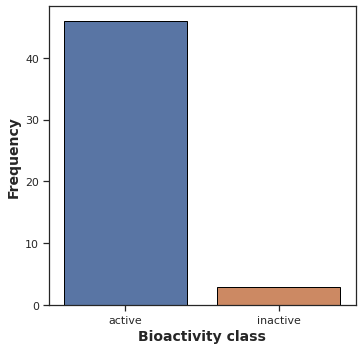

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 1 bioactivity class is spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

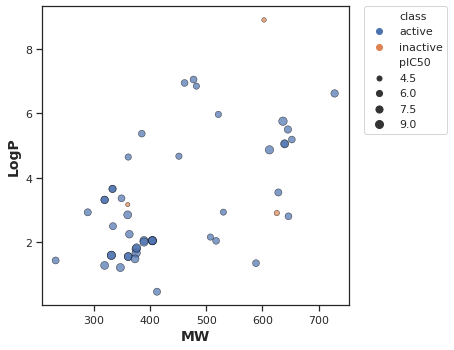

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

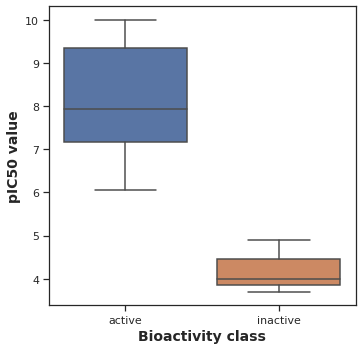

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [46]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [47]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.002132,0.05,Different distribution (reject H0)


#### **MW**

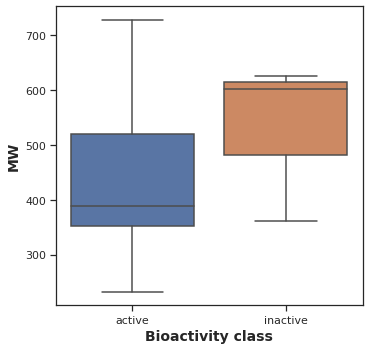

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [49]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,50.0,0.220146,0.05,Same distribution (fail to reject H0)


#### **LogP**

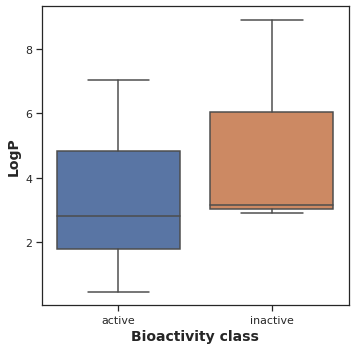

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [51]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,42.0,0.134497,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

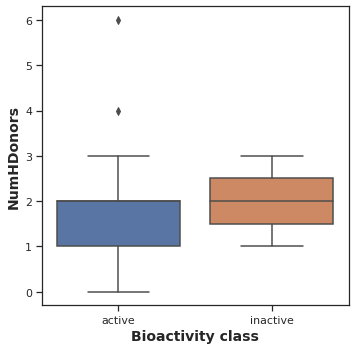

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [53]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,61.5,0.37273,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

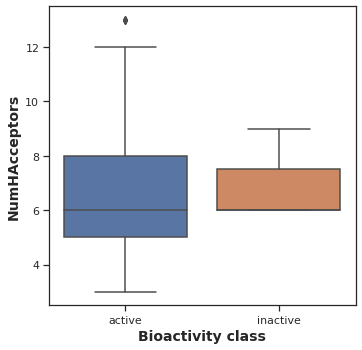

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [55]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,54.5,0.277477,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***no statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [56]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: DNA topoisomerase II beta_04_bioactivity_data_3class_pIC50.csv (deflated 69%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_pIC50.csv (deflated 9%)
updating: DNA topoisomerase II beta_05_bioactivity_data_2class_pIC50.csv (deflated 69%)
updating: DNA topoisomerase II beta_03_bioactivity_data_curated.csv (deflated 72%)
updating: plot_MW.pdf (deflated 39%)
updating: plot_NumHDonors.pdf (deflated 37%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: DNA topoisomerase II beta_01_bioactivity_data_raw.csv (deflated 86%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: plot_MW_vs_LogP.pdf (deflated 21%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_ic50.pdf (deflated 36%)
updating: plot_bioactivity_class.pdf (deflated 39%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: DNA topoisomerase II beta_02_bioactivity_data_preprocessed.csv (deflated 71%)


# **Descriptor Calculation and Dataset Preparation**
 Here, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. We will also be preparing this into a dataset for subsequent model building.

## **Download PaDEL-Descriptor**

In [57]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-04-16 14:21:36--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-04-16 14:21:37--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-04-16 14:21:38 (215 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-04-16 14:21:38--  https://gi

In [58]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [59]:
df6 = pd.read_csv('DNA topoisomerase II beta_04_bioactivity_data_3class_pIC50.csv')

In [60]:
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL158264,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2c...,active,639.506,5.05580,2.0,13.0,7.397940
1,1,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,9.397940
2,2,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,10.000000
3,3,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,612.480,4.86850,2.0,12.0,9.698970
4,4,CHEMBL134040,CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H]...,inactive,625.629,2.90000,1.0,9.0,4.903090
5,5,CHEMBL10407,CC(/C=C/C(O)=C1\C(=O)CNC1=O)=C\c1cccc2ccccc12,active,319.360,3.31030,2.0,3.0,7.769551
6,6,CHEMBL10893,O=C(/C=C/C(Br)=C/c1ccccc1)C1=C(O)CNC1=O,active,334.169,2.48960,2.0,3.0,7.522879
7,7,CHEMBL10956,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1cccc2ccccc12,active,333.387,3.65250,1.0,3.0,7.309804
8,8,CHEMBL10540,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\c1c(O)ccc2ccc...,active,349.386,3.35810,2.0,4.0,7.193820
9,9,CHEMBL10359,CC(/C=C/C(=O)C1=C(O)CN(C)C1=O)=C\C1CCCCC1,active,289.375,2.92240,1.0,3.0,7.508638


In [61]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [62]:
! cat molecule.smi | head -5

COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@@H](Nc1nc(-c2ccc([N+](=O)[O-])cc2)cs1)C1=NOCCO1	CHEMBL158264
COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2ccc([N+](=O)[O-])cc2)cs1)C1=NOCCO1	CHEMBL157769
COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2ccc([N+](=O)[O-])cc2)cs1)c1nc(C)no1	CHEMBL157831
COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2ccc([N+](=O)[O-])cc2)cs1)C(=O)OC	CHEMBL156813
CCOC(=O)c1cn(CC)c2cc(N3CCN(C(=O)c4ccc(N5C[C@H](CNC(C)=O)OC5=O)cc4F)CC3)c(F)cc2c1=O	CHEMBL134040


In [63]:
! cat molecule.smi | wc -l

56


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [64]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [65]:
! bash padel.sh

Processing CHEMBL158264 in molecule.smi (1/56). 
Processing CHEMBL157769 in molecule.smi (2/56). 
Processing CHEMBL156813 in molecule.smi (4/56). Average speed: 1.57 s/mol.
Processing CHEMBL157831 in molecule.smi (3/56). Average speed: 3.11 s/mol.
Processing CHEMBL134040 in molecule.smi (5/56). Average speed: 1.47 s/mol.
Processing CHEMBL10407 in molecule.smi (6/56). Average speed: 1.12 s/mol.
Processing CHEMBL10893 in molecule.smi (7/56). Average speed: 1.05 s/mol.
Processing CHEMBL10956 in molecule.smi (8/56). Average speed: 1.11 s/mol.
Processing CHEMBL10540 in molecule.smi (9/56). Average speed: 0.80 s/mol.
Processing CHEMBL10359 in molecule.smi (10/56). Average speed: 0.76 s/mol.
Processing CHEMBL268018 in molecule.smi (11/56). Average speed: 0.69 s/mol.
Processing CHEMBL10299 in molecule.smi (12/56). Average speed: 0.63 s/mol.
Processing CHEMBL274899 in molecule.smi (13/56). Average speed: 0.67 s/mol.
Processing CHEMBL331076 in molecule.smi (14/56). Average speed: 0.57 s/mol.
Pro

In [66]:
! ls -l

total 274804
-rw-r--r-- 1 root root   110831 Apr 16 14:22  descriptors_output.csv
-rw-r--r-- 1 root root    33929 Apr 16 14:20 'DNA topoisomerase II beta_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root     4434 Apr 16 14:20 'DNA topoisomerase II beta_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root     4880 Apr 16 14:20 'DNA topoisomerase II beta_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root     8049 Apr 16 14:21 'DNA topoisomerase II beta_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root     6940 Apr 16 14:21 'DNA topoisomerase II beta_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 root root    14762 Apr 16 14:20  DNA.zip
drwxr-xr-x 3 root root     4096 Apr 16 14:21  __MACOSX
-rw-r--r-- 1 root root      121 Apr 16 14:21  mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Apr 16 14:21  mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Apr 16 14:21  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      126 Apr 16 14:21  mannwhitneyu_Num

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [67]:
df6_X = pd.read_csv('descriptors_output.csv')

In [68]:
df6_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL157769,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL158264,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL156813,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL157831,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL10407,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL134040,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL10893,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL10956,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL10540,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CHEMBL10359,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df6_X = df6_X.drop(columns=['Name'])
df6_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [70]:
df6_Y = df6['pIC50']
df6_Y

0      7.397940
1      9.397940
2     10.000000
3      9.698970
4      4.903090
5      7.769551
6      7.522879
7      7.309804
8      7.193820
9      7.508638
10     7.000000
11     8.455932
12     7.987163
13     8.494850
14     9.602060
15     9.397940
16     9.769551
17     9.000000
18     9.795880
19     9.508638
20     9.031517
21     9.522879
22     9.000000
23     9.698970
24     9.000000
25     8.920819
26     9.000000
27     9.455932
28     9.508638
29     9.229148
30     6.301030
31     7.022276
32     6.301030
33     7.283997
34     7.234331
35     6.301030
36     6.181774
37     7.089269
38     7.499215
39     8.164309
40     6.956834
41     7.899629
42     7.156145
43     6.236572
44     6.065502
45     5.455932
46     5.559091
47     5.031984
48     3.994819
49     7.522879
50     5.939302
51     5.279841
52     5.974694
53     5.362510
54     6.886057
55     3.698970
Name: pIC50, dtype: float64

## **Combining X and Y variable**

In [71]:
dataset6 = pd.concat([df6_X,df6_Y], axis=1)
dataset6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.397940
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.698970
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.903090
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.769551
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.522879
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.309804
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.193820
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [72]:
dataset6.to_csv('DNA topoisomerase II beta_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

#**Regression Models with Random Forest**
Here, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

## **Import libraries**

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [74]:
df7 = pd.read_csv('/content/DNA topoisomerase II beta_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **Input features**
The ***DNA topoisomerase II beta*** data set contains 881 input features and 1 output variable (pIC50 values).

### **Input features**

In [75]:
X = df7.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Output features**

In [76]:
Y = df7.pIC50
Y

0      7.397940
1      9.397940
2     10.000000
3      9.698970
4      4.903090
5      7.769551
6      7.522879
7      7.309804
8      7.193820
9      7.508638
10     7.000000
11     8.455932
12     7.987163
13     8.494850
14     9.602060
15     9.397940
16     9.769551
17     9.000000
18     9.795880
19     9.508638
20     9.031517
21     9.522879
22     9.000000
23     9.698970
24     9.000000
25     8.920819
26     9.000000
27     9.455932
28     9.508638
29     9.229148
30     6.301030
31     7.022276
32     6.301030
33     7.283997
34     7.234331
35     6.301030
36     6.181774
37     7.089269
38     7.499215
39     8.164309
40     6.956834
41     7.899629
42     7.156145
43     6.236572
44     6.065502
45     5.455932
46     5.559091
47     5.031984
48     3.994819
49     7.522879
50     5.939302
51     5.279841
52     5.974694
53     5.362510
54     6.886057
55     3.698970
Name: pIC50, dtype: float64

### **Examine the data dimension**

In [77]:
X.shape, Y.shape

((56, 881), (56,))

### **Remove low variance features**

In [78]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [79]:
X.shape

(56, 192)

## **Data split (80/20 ratio)**

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
X_train.shape, Y_train.shape

((44, 192), (44,))

In [82]:
X_test.shape, Y_test.shape

((12, 192), (12,))

## **Building a Regression Model using Random Forest**

In [83]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3470043422015656

In [84]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

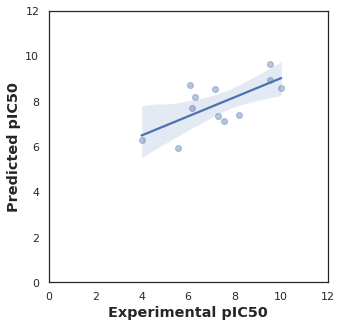

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show